In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [2]:
def X_matrix(X: np.ndarray, N) -> np.ndarray:
    '''
    Create Polynomial Features
    '''
    n_samples = X.shape[0]
    X_temp = np.ones((n_samples, 1))
    
    for deg in range(1, N + 1):
        X_temp = np.hstack((X_temp, X ** deg))
    
    return X_temp

In [3]:
def estimate_B(X, Y):
    '''
    Estimate Parameters Using OLS
    '''
    B = np.linalg.inv(X.T @ X) @ (X.T @ Y)
    return B

In [4]:
# Load data
data = pd.read_csv('train.csv')
train_x = data['x'].to_numpy()
train_y = data['y'].to_numpy()

In [5]:
# Get the indices that would sort x
sorted_indices = np.argsort(train_x) 
x_sorted = train_x[sorted_indices]   
y_sorted = train_y[sorted_indices]

In [6]:

# Make Input Matrix
degree = 10
X_train = X_matrix(x_sorted.reshape(-1, 1), degree)
print(X_train)

# Estimate Parameters For Training Data
B = estimate_B(X_train, y_sorted)
print(B)

# Predict Outputs
pred_y_train = X_train @ B

[[ 1.00000000e+00 -2.97182714e+00  8.83175657e+00 ...  6.08398815e+03
  -1.80805611e+04  5.37323023e+04]
 [ 1.00000000e+00 -2.93143525e+00  8.59331261e+00 ...  5.45308723e+03
  -1.59853721e+04  4.68600833e+04]
 [ 1.00000000e+00 -2.92971549e+00  8.58323288e+00 ...  5.42754689e+03
  -1.59011682e+04  4.65858989e+04]
 ...
 [ 1.00000000e+00  2.94203368e+00  8.65556220e+00 ...  5.61282015e+03
   1.65131059e+04  4.85821139e+04]
 [ 1.00000000e+00  2.96640474e+00  8.79955707e+00 ...  5.99574631e+03
   1.77858103e+04  5.27599118e+04]
 [ 1.00000000e+00  2.99308204e+00  8.95854009e+00 ...  6.44093575e+03
   1.92782491e+04  5.77013812e+04]]
[ 8.38845644e+01  9.86789556e+00  2.26103114e+01 -2.30013493e+01
 -6.65731930e+00  5.83580442e+00  1.23508135e+00 -8.33630110e-01
 -1.58956284e-01  4.37326477e-02  6.73538041e-03]


In [7]:
# Error
ssr_train = np.sum((pred_y_train - y_sorted) ** 2)
print(f'SSR: {ssr_train}')

# Save the parameters to a file
with open('3_weights.pkl', 'wb') as f:
    pickle.dump(B, f)

SSR: 233592.20391654767


In [8]:
# Load test data
test_data = pd.read_csv('test.csv')  
test_x = test_data[['x']].to_numpy()
test_id = test_data['id'].to_numpy()

# Create polynomial features for test data
X_test = X_matrix(test_x, degree)

# Make predictions on the test set
test_predictions = X_test @ B

# Save test predictions to CSV
test_output = pd.DataFrame({'id': test_id, 'x': test_x.flatten(), 'y': test_predictions.flatten()})
test_output.to_csv('test_predictions.csv', index=False)

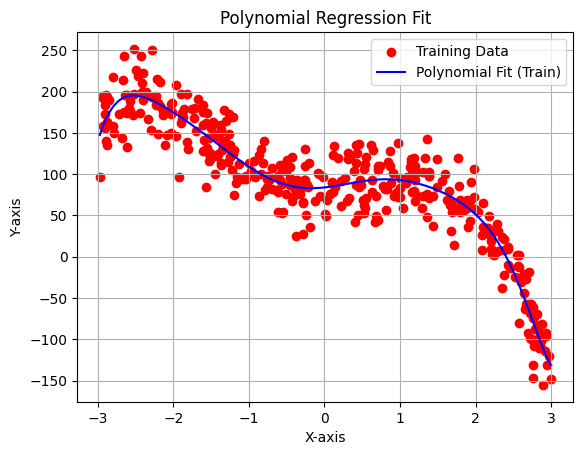

In [9]:
# Plotting
plt.scatter(x_sorted, y_sorted, color='red', label='Training Data')
plt.plot(x_sorted, pred_y_train, color='blue', label='Polynomial Fit (Train)')
plt.title('Polynomial Regression Fit')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()
